<h1>Data Science Job Salaries</h1>

Salaries of jobs in the Data Science domain

```
work_year               The year the salary was paid.
experience_level        The experience level in the job during the year with the following possible values: 
                        EN      Entry-level / Junior          
                        MI      Mid-level / Intermediate   
                        SE      Senior-level / Expert          
                        EX      Executive-level / Director
employment_type         The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
job_title               The role worked in during the year.
salary                  The total gross salary amount paid.
salary_currency         The currency of the salary paid as an ISO 4217 currency code.
salaryinusd             The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
employee_residence      Employee's primary country of residence in during the work year as an ISO 3166 country code.
remote_ratio            The overall amount of work done remotely, possible values are as follows: 0 No remote work
                        (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
company_location        The country of the employer's main office or contracting branch as an ISO 3166 country code.
company_size            The average number of people that worked for the company during the year: 
                        S       less than 50 employees (small) 
                        M       50 to 250 employees (medium) 
                        L       more than 250 employees (large)
```

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tarfile
import urllib
import urllib.request
# Import for plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import seaborn as sns

In [12]:

df=pd.read_csv('/Users/kevinc/Desktop/Data Science/F21DL Data Mining Machine Learning/F21SC CW/datascience.csv')

In [13]:
df.shape

(607, 12)

In [14]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [15]:

#Show data type of each column
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [3]:

df.info()
#df['remote_ration'].unique()

NameError: name 'df' is not defined

In [17]:
df.isna().sum()
#there is no null data

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [18]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [19]:
df.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [20]:
df['employment_type'].value_counts()

#almost all value is FT (Full time), hence its irrelavant

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

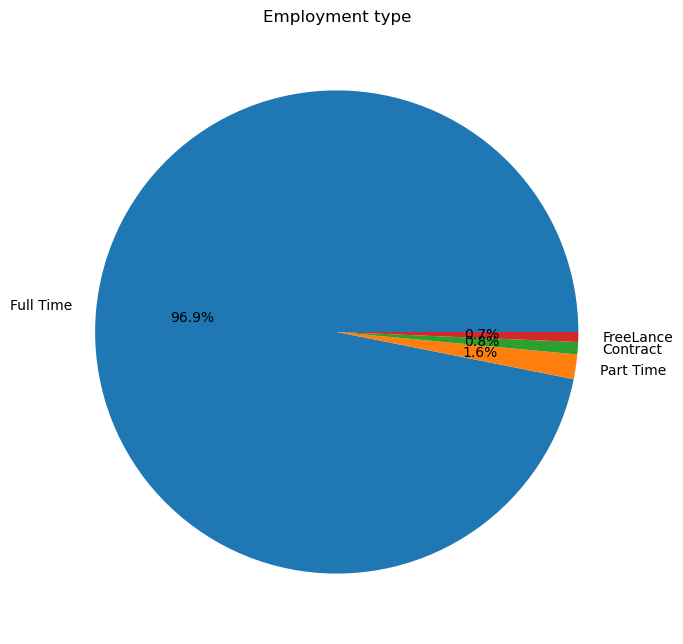

In [21]:
labels = ['Full Time','Part Time','Contract','FreeLance']
plt.figure(figsize=(12, 8), dpi=100)
plt.pie(df.employment_type.value_counts(),autopct='%1.1f%%',labels=labels)
plt.title('Employment type')
plt.show()

In [22]:
year=df['work_year'].value_counts()
year


2022    318
2021    217
2020     72
Name: work_year, dtype: int64

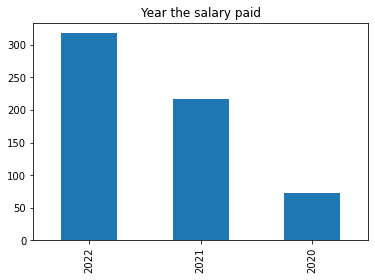

In [23]:
year.plot(kind='bar' )
plt.title('Year the salary paid')
plt.show()

In [24]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [25]:
ndf=(df.employee_residence.value_counts() < 6).rename_axis('other').reset_index()
ndf



,other,employee_residence
0,US,False
1,GB,False
2,IN,False
3,CA,False
4,DE,False
5,FR,False
6,ES,False
7,GR,False
8,JP,False
9,PT,False


In [26]:
#show record of how many employee residience country doesnt match the location the company located
d=df[['employee_residence','company_location']]
(d['employee_residence']!=d['company_location']).sum()

51

In [27]:
df['job_title'].nunique()

# 50 different job titles

50

In [28]:
df['job_title'].unique()


array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

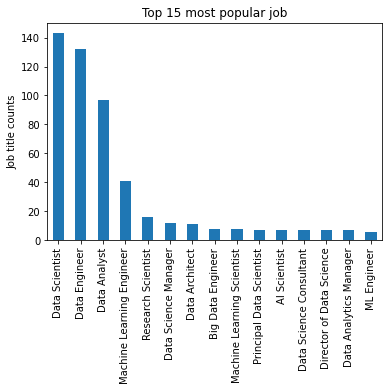

In [29]:

A=df['job_title'].value_counts()
A.head(15).plot(kind='bar')

plt.title('Top 15 most popular job')
# plt.xlabel('Job Title')
plt.ylabel('Job title counts')
plt.show()

<AxesSubplot:>

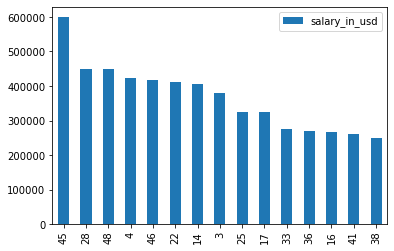

In [30]:
a=df.groupby('job_title',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False)
a.head(15).plot(kind='bar' )


In [31]:
df['salary_in_usd'].sort_values(ascending=False)
#show the highest wage

252    600000
97     450000
33     450000
157    423000
225    416000
        ...  
179      5679
77       5409
238      4000
185      4000
176      2859
Name: salary_in_usd, Length: 607, dtype: int64

<AxesSubplot:ylabel='Frequency'>

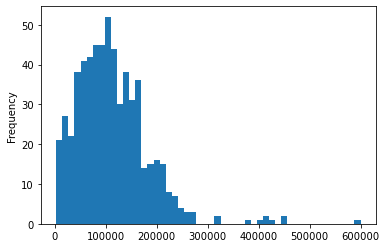

In [32]:

df['salary_in_usd'].plot(kind='hist',bins=50)


In [33]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'work_year'}>],
       [<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'salary_in_usd'}>],
       [<AxesSubplot:title={'center':'remote_ratio'}>, <AxesSubplot:>]],
      dtype=object)

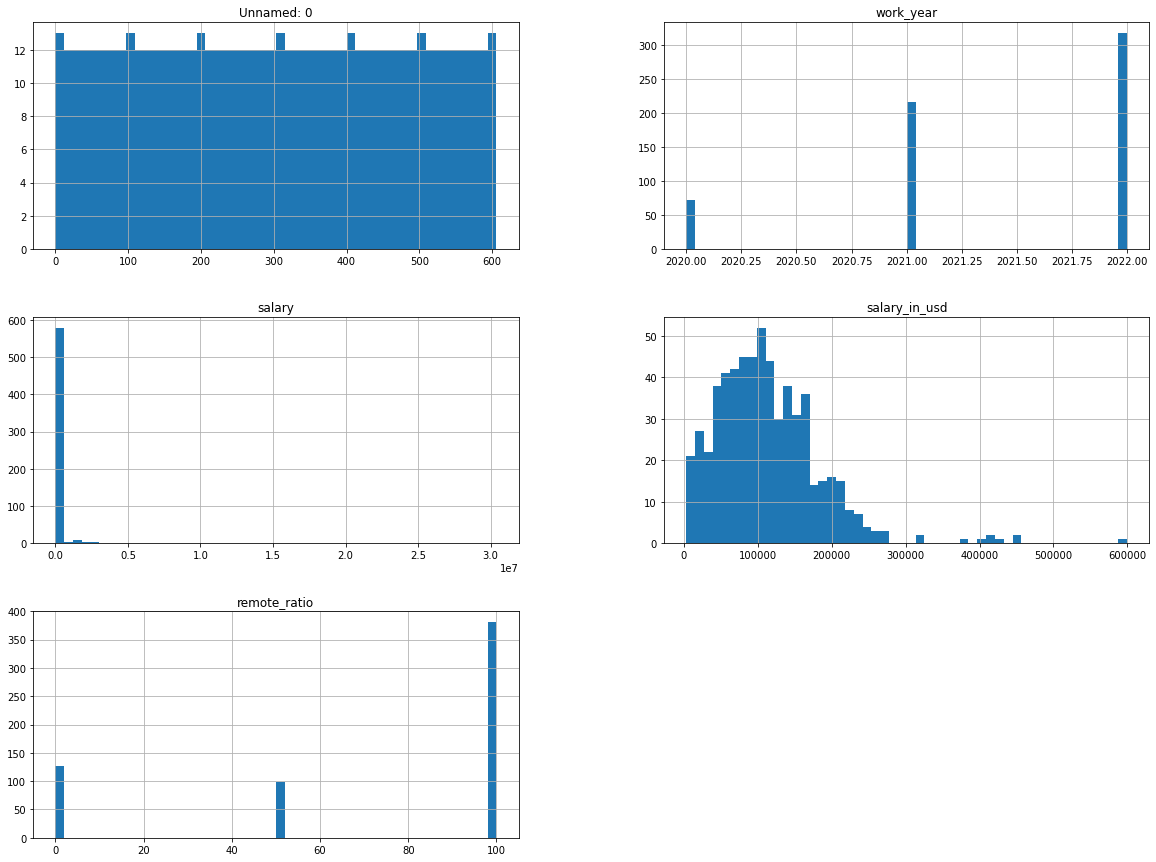

In [34]:
df.hist(bins=50, figsize=(20,15))

In [35]:
corr_matrix=df.corr()

In [36]:

corr_matrix['salary_in_usd'].sort_values(ascending=False)
# need to convert all the columns into categorical


salary_in_usd    1.000000
work_year        0.170493
Unnamed: 0       0.167025
remote_ratio     0.132122
salary          -0.083906
Name: salary_in_usd, dtype: float64

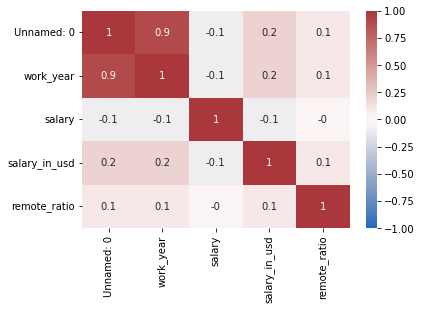

In [37]:


corr_matrix = df.corr().round(1)
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [38]:
df['work_year']=le.fit_transform(df['work_year'])
df['experience_level']=le.fit_transform(df['experience_level'])
df['job_title']=le.fit_transform(df['job_title'])
df['employee_residence']=le.fit_transform(df['employee_residence'])
df['company_location']=le.fit_transform(df['company_location'])
df['company_size']=le.fit_transform(df['company_size'])
df['employment_type']=le.fit_transform(df['employment_type'])
df['salary_currency']=le.fit_transform(df['salary_currency'])



In [39]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,0,2,2,22,70000,7,79833,14,0,12,0
1,1,0,3,2,41,260000,16,260000,32,0,29,2
2,2,0,3,2,7,85000,8,109024,20,50,18,1
3,3,0,2,2,47,20000,16,20000,23,0,20,2
4,4,0,3,2,38,150000,16,150000,55,50,48,0


In [40]:
corr_matrix['salary_in_usd'].sort_values(ascending=False)

salary_in_usd    1.0
Unnamed: 0       0.2
work_year        0.2
remote_ratio     0.1
salary          -0.1
Name: salary_in_usd, dtype: float64

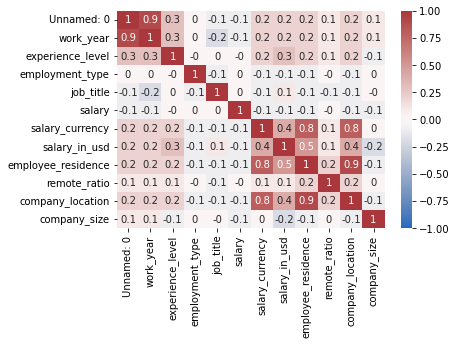

In [41]:
corr_matrix = df.corr().round(1)
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [42]:
X= df.drop('salary_in_usd', axis=1)       #use all attribute for prediction
#X= df['job_title','company_location']       #use all attribute for prediction

y= df['salary_in_usd']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=21)

In [44]:
len(X_train)

485

In [50]:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [46]:
lr.fit(X_train,y_train)

LinearRegression()

<h>Prepare data for machine learning</h>

In [47]:
df.drop(['salary_currency','employment_type','salary'], axis=1,inplace=True )
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.head()

#dataset 1?

# Almost all value is FT (Full time), hence its irrelavant and dropped
# We already have salary in USD and country they work in as comparision hence salary currency is irrelavant and dropped
# drop the first unnamed columns which contain no useful data.

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2,22,79833,14,0,12,0
1,0,3,41,260000,32,0,29,2
2,0,3,7,109024,20,50,18,1
3,0,2,47,20000,23,0,20,2
4,0,3,38,150000,55,50,48,0


In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
ohe=OneHotEncoder()
#ohe.fit_transform(df[['experience_level']])

In [49]:
ohe.fit_transform(df[['experience_level']])

<607x4 sparse matrix of type '<class 'numpy.float64'>'
	with 607 stored elements in Compressed Sparse Row format>